## Import libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

## Dataset path

In [4]:
data_path = "../data/emnist/"
train_data_path = data_path + "emnist-balanced-train.csv"
test_data_path = data_path + "emnist-balanced-test.csv"

## Loading train and test datasets

In [5]:
train_df = pd.read_csv(train_data_path, header=None)
test_df = pd.read_csv(test_data_path, header=None)

In [6]:
print(f'The train dataset contains {train_df.shape[0]} observation and {train_df.shape[1]} characterisitics (which one is dependant variable, and rest are independant variables)')

The train dataset contains 112800 observation and 785 characterisitics (which one is dependant variable, and rest are independant variables)


In [7]:
print(f'The test dataset contains {test_df.shape[0]} observation and {test_df.shape[1]} characterisitics')

The test dataset contains 18800 observation and 785 characterisitics


In [8]:
train_df.sample(5, random_state=31)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
79344,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,34,124,77,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,47,190,234,253,200,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,83,176,247,254,232,95,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,95,232,251,254,235,154,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,36,159,232,254,254,242,132,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,191,234,253,254,247,164,47,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,47,159,249,254,254,255,227,67,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,51,127,208,247,254,254,255,255,247,164,52,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,174,250,254,254,252,233,217,217,222,251,254,250,206,10,0,0,0,0,0,0,0,0,0,0,0,0,3,111,243,254,250,243,177,82,39,37,51,175,246,254,247,91,7,0,0,0,0,0,0,0,0,0,0,0,2,77,218,220,141,113,34,2,0,0,0,36,163,245,254,202,34,0,0,0,0,0,0,0,0,0,0,0,0,8,77,77,11,4,0,0,0,0,0,1,35,164,247,228,69,1,0

- The first column in the dataframe represents the class label (see mappings.txt for class label definitions)

In [9]:
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

### Plotting images from dataset

In [10]:
def plot_image(df,row,title=None):
    img = df.values[row, 1:].reshape([28,28])
    plt.imshow(img, cmap="Greys_r")
    if title is None:
        label = class_mapping[df.values[row,0]]
        plt.title(f'Label = {label}')
    else:
        plt.title(title)
    plt.show()

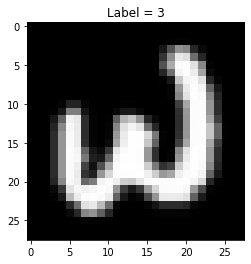

In [11]:
plot_image(train_df, 35302)

### The data is flipped

In [12]:
def plot_flipped_image(df, row, title=None):
    img = df.values[row, 1:].reshape([28,28])
    img_flipped = np.transpose(img, axes=[1,0])
    plt.imshow(img_flipped, cmap="Greys_r")
    if title is None:
        label = class_mapping[df.values[row,0]]
        plt.title(f'Label = {label}')
    else:
        plt.title(title)
    plt.show()

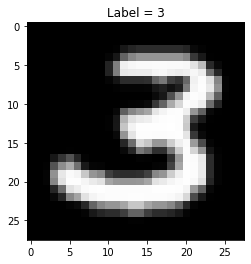

In [13]:
plot_flipped_image(train_df, 35302)

## Split X and y

In [14]:
train_X, train_y = train_df.iloc[:,1:].values, train_df.iloc[:,0].values
test_X, test_y = test_df.iloc[:,1:].values, test_df.iloc[:,0].values

In [15]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(112800, 784) (112800,) (18800, 784) (18800,)


## Preprocessing

### Rotating images

In [16]:
img_size = int(np.sqrt(len(train_df.columns)-1))
def rotate(image):
    image = image.reshape([img_size, img_size])    
    image = np.transpose(image,axes=[1,0])
    return image

In [17]:
train_X = np.apply_along_axis(rotate, 1, train_X)
print(train_X.shape, train_X.dtype)


(112800, 28, 28) int64


In [18]:
test_X = np.apply_along_axis(rotate, 1, test_X)

print(test_X.shape, test_X.dtype)


(18800, 28, 28) int64


### Normalisation

In [19]:
train_X = train_X.astype('float64')
test_X = test_X.astype('float64')

train_X /= 255.0
test_X /= 255.0

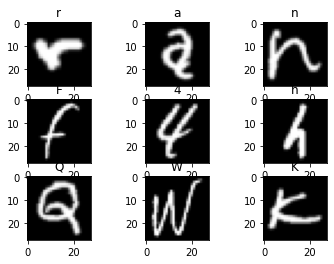

In [20]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.title(class_mapping[train_y[i]])


### One-hot encoding targets

In [21]:
num_classes = len(train_df[0].unique())
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

### Reshaping images for CNN

In [22]:
train_X = train_X.reshape(-1, img_size, img_size, 1) #112800 (28x28x1) images (0-1 range)
test_X = test_X.reshape(-1, img_size, img_size, 1) #18800 (28x28x1) images (0-1 range)
print(train_X.shape, test_X.shape)

(112800, 28, 28, 1) (18800, 28, 28, 1)


## Model building

### Splitting dataset

In [23]:
from sklearn.model_selection import train_test_split

train_sp_X,test_sp_X,train_sp_y,test_sp_y = train_test_split(train_X, train_y, test_size=0.2, random_state=129)

In [24]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

filepath="../models/model-{epoch:02d}-{val_accuracy:.2f}.h5"

MCP = ModelCheckpoint(filepath,
                        verbose=1,
                        save_best_only=True,
                        monitor='val_accuracy',
                        mode='max')
ES = EarlyStopping(monitor='val_accuracy',
                    min_delta=0,
                    verbose=1,
                    restore_best_weights=True,
                    patience=3,
                    mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',
                        patience=3,
                        factor=0.2,
                        min_lr=0.0001)

In [27]:
history = model.fit(train_sp_X, train_sp_y, epochs=10,
                    validation_data=(test_sp_X, test_sp_y),
                    callbacks=[MCP,ES,RLP])

Epoch 1/10
2820/2820 [==============================] - 28s 9ms/step - loss: 1.1196 - accuracy: 0.6709 - val_loss: 0.5583 - val_accuracy: 0.8215

Epoch 00001: val_accuracy improved from -inf to 0.82145, saving model to ../models\model-01-0.82.h5
Epoch 2/10
2820/2820 [==============================] - 25s 9ms/step - loss: 0.4510 - accuracy: 0.8485 - val_loss: 0.5224 - val_accuracy: 0.8317

Epoch 00002: val_accuracy improved from 0.82145 to 0.83174, saving model to ../models\model-02-0.83.h5
Epoch 3/10
2820/2820 [==============================] - 25s 9ms/step - loss: 0.3727 - accuracy: 0.8703 - val_loss: 0.5208 - val_accuracy: 0.8283

Epoch 00003: val_accuracy did not improve from 0.83174
Epoch 4/10
2820/2820 [==============================] - 25s 9ms/step - loss: 0.3481 - accuracy: 0.8789 - val_loss: 0.6090 - val_accuracy: 0.8175

Epoch 00004: val_accuracy did not improve from 0.83174
Epoch 5/10
2820/2820 [==============================] - 25s 9ms/step - loss: 0.3305 - accuracy: 0.8845 

Text(0, 0.5, 'Accuray')

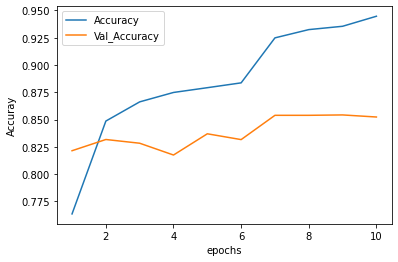

In [28]:
import seaborn as sns

q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Predictions

### Predict using test set

In [33]:
def run_prediction(row):
    input_ = test_X[row].reshape(1,28,28,1)
    result = np.argmax(model.predict(input_))
    prediction = class_mapping[result]
    label = test_df.values[row,0]
    plot_flipped_image(test_df, row, title=f"Prediction {prediction} - Label {label}")

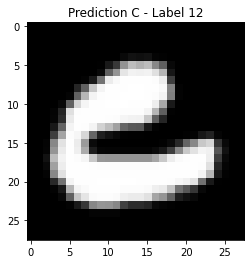

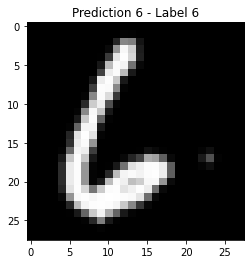

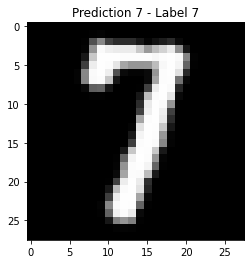

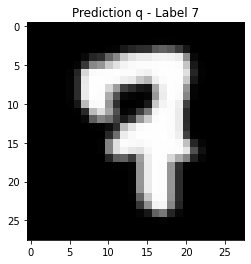

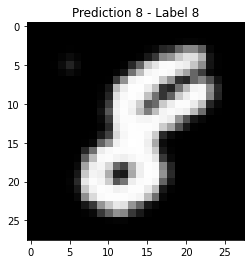

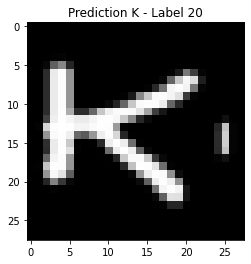

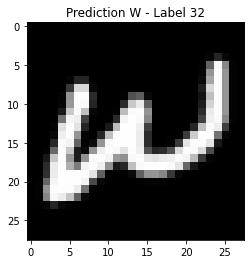

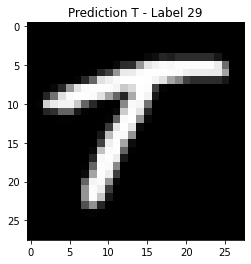

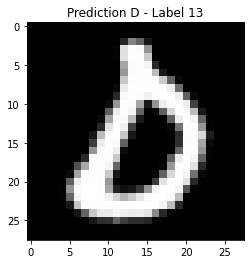

In [34]:
import random
import time

for _ in range(1,10):
    idx = random.randint(0, len(test_df))
    run_prediction(idx)

### Predict using custom images

In [37]:

from PIL import Image
from numpy import asarray
import os

def pred(path):
    image = Image.open(path)
    image = image.convert('L')
    # convert image to numpy array
    data = asarray(image)
    # convert array to 28x28 array (matrix)
    img = data.reshape([28,28])
    data = data.reshape(1,28,28,1)
    # normalize image
    d = data / 255.0
    # run prediction
    result = np.argmax(model.predict(d))
    prediction = class_mapping[result]
    _, label = os.path.split(path)
    label = label.split('.')[-1][0]
    plt.imshow(img, cmap="Greys_r")
    plt.title(f'Prediction {prediction} - Label {label}')
    plt.show()


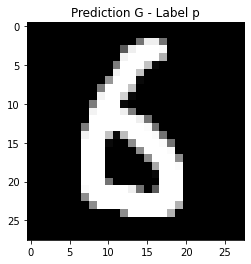

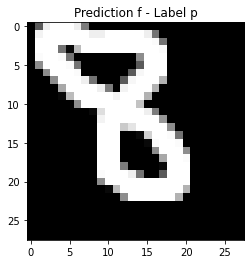

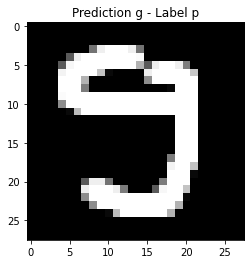

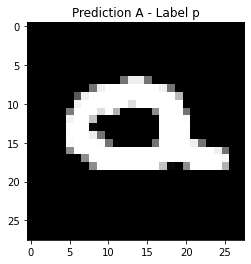

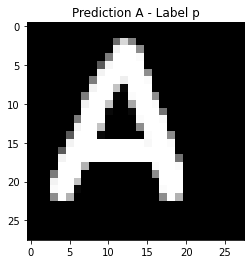

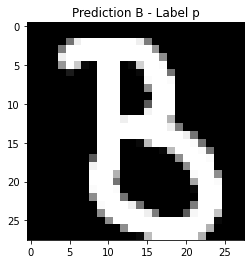

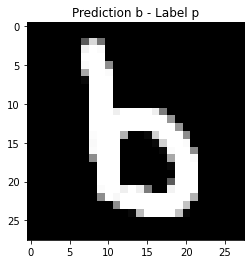

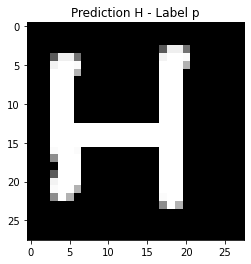

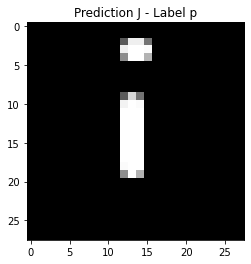

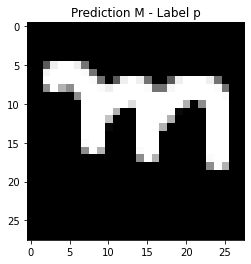

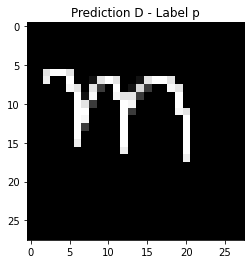

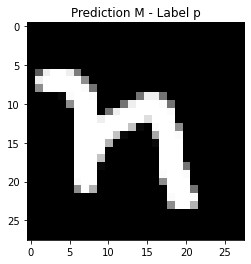

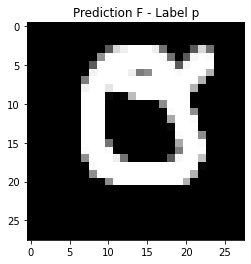

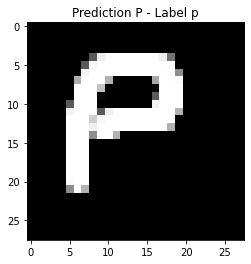

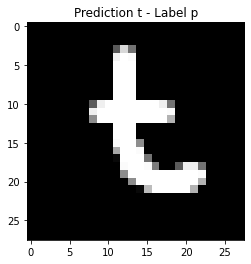

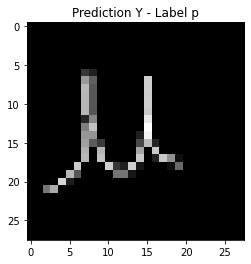

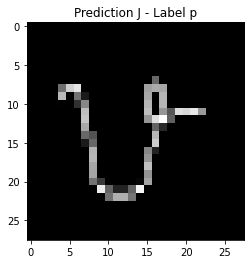

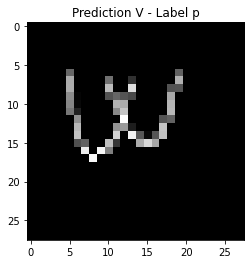

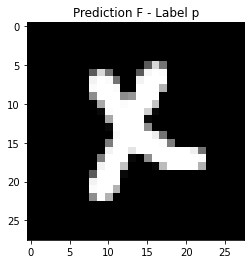

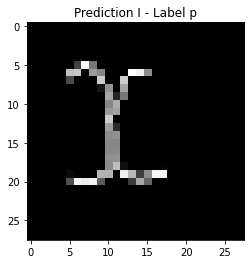

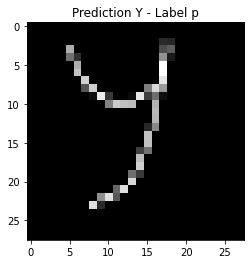

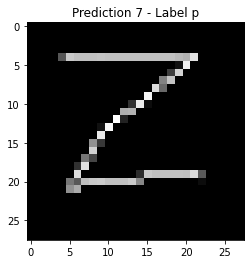

In [39]:
directory = '..\data\images'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        pred(f)
